In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/ClumateChangeData')

In [3]:
!ls

ArdsleyHackathon.ipynb	    CO2Data.csv		  TempData.csv
clean_data.csv		    GreenhouseGasses.csv
ClimateChangeProject.ipynb  Lstm.h5


#Data Pre-Processing

In [4]:
import pandas as pd

# Read CO2 Emissions data
co2Data = pd.read_csv('CO2Data.csv')


# Read Greenhouse Gases data
ggData = pd.read_csv('GreenhouseGasses.csv')

# Read Surface Temperature Change data
tempData = pd.read_csv('TempData.csv')

# Now you can perform data preprocessing or further analysis on the loaded datasets

In [5]:
ggData.head()

,Year,CO2,CH4,N2O,CFC*,HCFCs,HFCs*,Total,Total.1,1990 = 1,change **
0,1979,1.027,0.406,0.104,0.154,0.008,0.001,1.700,382,0.785,NaN
1,1980,1.060,0.413,0.104,0.163,0.009,0.001,1.749,386,0.808,2.3
2,1981,1.079,0.420,0.107,0.172,0.009,0.001,1.788,388,0.825,1.8
3,1982,1.091,0.426,0.111,0.180,0.010,0.001,1.819,391,0.840,1.5
4,1983,1.117,0.429,0.113,0.190,0.011,0.001,1.861,394,0.859,1.9


In [6]:
tempData.head()

,Year,Value
0,1850,-0.22
1,1851,-0.19
2,1852,-0.38
3,1853,-0.18
4,1854,-0.22


In [7]:
tempData.tail()

,Year,Value
169,2019,1.05
170,2020,1.11
171,2021,0.79
172,2022,0.90
173,2023,1.00


In [8]:
co2Data.head()

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12


In [9]:
ggData.describe()

,Year,CO2,CH4,N2O,CFC*,HCFCs,HFCs*,Total,Total.1,1990 = 1,change **
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,44.000000
mean,2000.911111,1.570311,0.475667,0.154622,0.251378,0.034044,0.014711,2.500689,445.244444,1.154733,1.677273
std,12.990945,0.343749,0.030469,0.032262,0.034604,0.017099,0.014129,0.452937,37.559744,0.209166,0.377177
min,1979.000000,1.027000,0.406000,0.104000,0.154000,0.008000,0.001000,1.700000,382.000000,0.785000,0.700000
25%,1990.000000,1.294000,0.459000,0.129000,0.246000,0.018000,0.003000,2.166000,417.000000,1.000000,1.500000
50%,2001.000000,1.538000,0.481000,0.153000,0.263000,0.034000,0.009000,2.494000,443.000000,1.152000,1.700000
75%,2012.000000,1.848000,0.494000,0.181000,0.276000,0.051000,0.025000,2.860000,475.000000,1.321000,1.825000
max,2021.000000,2.140000,0.526000,0.210000,0.282000,0.058000,0.044000,3.222000,508.000000,1.488000,2.700000


In [10]:
tempData.describe()

,Year,Value
count,174.000000,174.000000
mean,1936.500000,0.050115
std,50.373604,0.374245
min,1850.000000,-0.590000
25%,1893.250000,-0.210000
50%,1936.500000,-0.070000
75%,1979.750000,0.237500
max,2023.000000,1.140000


In [11]:
co2Data.describe()

,year,mean,unc
count,64.000000,64.000000,64.00
mean,1990.500000,358.295156,0.12
std,18.618987,30.583707,0.00
min,1959.000000,315.980000,0.12
25%,1974.750000,330.895000,0.12
50%,1990.500000,355.075000,0.12
75%,2006.250000,382.572500,0.12
max,2022.000000,418.560000,0.12


In [12]:
# Check for missing values in each dataset
co2_missing_values = co2Data.isnull().sum()
gg_missing_values = ggData.isnull().sum()
temp_missing_values = tempData.isnull().sum()

# Print the number of missing values in each dataset
print("CO2 Emissions - Missing Values:")
print(co2_missing_values)

print("\nGreenhouse Gases - Missing Values:")
print(gg_missing_values)

print("\nSurface Temperature Change - Missing Values:")
print(temp_missing_values)

CO2 Emissions - Missing Values:
year    0
mean    0
unc     0
dtype: int64

Greenhouse Gases - Missing Values:
Year         0
CO2          0
CH4          0
N2O          0
CFC*         0
HCFCs        0
HFCs*        0
Total        0
Total.1      0
1990 = 1     0
change **    1
dtype: int64

Surface Temperature Change - Missing Values:
Year     0
Value    0
dtype: int64


In [13]:
co2Data = co2Data.fillna(co2Data.mean())
ggData = ggData.fillna(ggData.mean())
tempData = tempData.fillna(tempData.mean())

In [14]:
# rename 'year' column in co2Data
co2Data.rename(columns={'year': 'Year'}, inplace=True)

# filter dataframes to include data from 1974 to 2021 only
ggData = ggData[(ggData['Year'] >= 1979) & (ggData['Year'] <= 2021)]
tempData = tempData[(tempData['Year'] >= 1979) & (tempData['Year'] <= 2021)]
co2Data = co2Data[(co2Data['Year'] >= 1979) & (co2Data['Year'] <= 2021)]

# merge the dataframes
df = pd.merge(ggData, tempData, on='Year')
df = pd.merge(df, co2Data, on='Year')

In [15]:
df.tail()

,Year,CO2,CH4,N2O,CFC*,HCFCs,HFCs*,Total,Total.1,1990 = 1,change **,Value,mean,unc
40,2019,2.079,0.516,0.202,0.250,0.057,0.039,3.144,500,1.452,1.8,1.05,411.66,0.12
41,2020,2.111,0.520,0.206,0.248,0.057,0.041,3.183,504,1.470,1.8,1.11,414.24,0.12
42,2020,2.111,0.520,0.206,0.248,0.057,0.041,3.183,504,1.470,1.8,1.11,414.24,0.12
43,2021,2.140,0.526,0.210,0.246,0.058,0.044,3.222,508,1.488,1.8,0.79,416.45,0.12
44,2021,2.140,0.526,0.210,0.246,0.058,0.044,3.222,508,1.488,1.8,0.79,416.45,0.12


In [16]:
df.drop_duplicates(subset='Year', inplace=True)
df.reset_index(drop=True, inplace=True)

In [17]:
df.tail()

,Year,CO2,CH4,N2O,CFC*,HCFCs,HFCs*,Total,Total.1,1990 = 1,change **,Value,mean,unc
38,2017,2.016,0.509,0.195,0.254,0.056,0.035,3.065,493,1.415,1.6,0.97,406.76,0.12
39,2018,2.047,0.512,0.199,0.253,0.057,0.037,3.104,497,1.433,1.8,0.90,408.72,0.12
40,2019,2.079,0.516,0.202,0.250,0.057,0.039,3.144,500,1.452,1.8,1.05,411.66,0.12
41,2020,2.111,0.520,0.206,0.248,0.057,0.041,3.183,504,1.470,1.8,1.11,414.24,0.12
42,2021,2.140,0.526,0.210,0.246,0.058,0.044,3.222,508,1.488,1.8,0.79,416.45,0.12


In [18]:
# Define a dictionary with old column names as keys and new column names as values
rename_dict = {
    'Year': 'Year',
    'CO2': 'CO2',
    'CH4': 'Methane',
    'N2O': 'Nitrous_Oxide',
    'CFC*': 'CFCs',
    'HCFCs': 'Hydrochlorofluorocarbons',
    'HFCs*': 'Hydrofluorocarbons',
    'Total': 'Total_Greenhouse_Gases',
    'Total.1': 'Total_Greenhouse_Gases_Scaled',
    '1990 = 1': '1990_Equals_1',
    'change **': 'Change',
    'Value': 'Surface_Temperature',
    'mean': 'CO2_Mean',
    'unc': 'CO2_Uncertainty'
}

# Rename the columns
df.rename(columns=rename_dict, inplace=True)
df = df.drop(columns=['CO2_Uncertainty'])

In [19]:
df.describe()

,Year,CO2,Methane,Nitrous_Oxide,CFCs,Hydrochlorofluorocarbons,Hydrofluorocarbons,Total_Greenhouse_Gases,Total_Greenhouse_Gases_Scaled,1990_Equals_1,Change,Surface_Temperature,CO2_Mean
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,2000.000000,1.544488,0.473465,0.152140,0.251581,0.032953,0.013419,2.468047,442.418605,1.139651,1.671564,0.559070,372.598605
std,12.556539,0.329271,0.029334,0.030793,0.035405,0.016699,0.013059,0.436300,35.969056,0.201470,0.380656,0.268397,23.407123
min,1979.000000,1.027000,0.406000,0.104000,0.154000,0.008000,0.001000,1.700000,382.000000,0.785000,0.700000,0.100000,336.840000
25%,1989.500000,1.284000,0.457000,0.127500,0.247000,0.017500,0.002500,2.148000,415.500000,0.992000,1.500000,0.370000,353.825000
50%,2000.000000,1.515000,0.481000,0.151000,0.263000,0.032000,0.008000,2.468000,441.000000,1.140000,1.677273,0.560000,369.710000
75%,2010.500000,1.807000,0.491500,0.176000,0.277000,0.049000,0.022000,2.811000,470.500000,1.297500,1.850000,0.725000,390.975000
max,2021.000000,2.140000,0.526000,0.210000,0.282000,0.058000,0.044000,3.222000,508.000000,1.488000,2.700000,1.140000,416.450000


In [20]:
df.isnull().sum()

Year                             0
CO2                              0
Methane                          0
Nitrous_Oxide                    0
CFCs                             0
Hydrochlorofluorocarbons         0
Hydrofluorocarbons               0
Total_Greenhouse_Gases           0
Total_Greenhouse_Gases_Scaled    0
1990_Equals_1                    0
Change                           0
Surface_Temperature              0
CO2_Mean                         0
dtype: int64

In [21]:
df.to_csv('/content/drive/MyDrive/ClumateChangeData/clean_data.csv',index=False)

In [22]:
df_list = df.values.tolist()
df_list.insert(0, list(df.columns))

In [23]:
df.head()

,Year,CO2,Methane,Nitrous_Oxide,CFCs,Hydrochlorofluorocarbons,Hydrofluorocarbons,Total_Greenhouse_Gases,Total_Greenhouse_Gases_Scaled,1990_Equals_1,Change,Surface_Temperature,CO2_Mean
0,1979,1.027,0.406,0.104,0.154,0.008,0.001,1.700,382,0.785,1.677273,0.10,336.84
1,1980,1.060,0.413,0.104,0.163,0.009,0.001,1.749,386,0.808,2.300000,0.33,338.76
2,1981,1.079,0.420,0.107,0.172,0.009,0.001,1.788,388,0.825,1.800000,0.38,340.12
3,1982,1.091,0.426,0.111,0.180,0.010,0.001,1.819,391,0.840,1.500000,0.22,341.48
4,1983,1.117,0.429,0.113,0.190,0.011,0.001,1.861,394,0.859,1.900000,0.25,343.15


In [24]:
df.tail()

,Year,CO2,Methane,Nitrous_Oxide,CFCs,Hydrochlorofluorocarbons,Hydrofluorocarbons,Total_Greenhouse_Gases,Total_Greenhouse_Gases_Scaled,1990_Equals_1,Change,Surface_Temperature,CO2_Mean
38,2017,2.016,0.509,0.195,0.254,0.056,0.035,3.065,493,1.415,1.6,0.97,406.76
39,2018,2.047,0.512,0.199,0.253,0.057,0.037,3.104,497,1.433,1.8,0.90,408.72
40,2019,2.079,0.516,0.202,0.250,0.057,0.039,3.144,500,1.452,1.8,1.05,411.66
41,2020,2.111,0.520,0.206,0.248,0.057,0.041,3.183,504,1.470,1.8,1.11,414.24
42,2021,2.140,0.526,0.210,0.246,0.058,0.044,3.222,508,1.488,1.8,0.79,416.45


In [25]:
data=df.copy()

In [26]:
data.head()

,Year,CO2,Methane,Nitrous_Oxide,CFCs,Hydrochlorofluorocarbons,Hydrofluorocarbons,Total_Greenhouse_Gases,Total_Greenhouse_Gases_Scaled,1990_Equals_1,Change,Surface_Temperature,CO2_Mean
0,1979,1.027,0.406,0.104,0.154,0.008,0.001,1.700,382,0.785,1.677273,0.10,336.84
1,1980,1.060,0.413,0.104,0.163,0.009,0.001,1.749,386,0.808,2.300000,0.33,338.76
2,1981,1.079,0.420,0.107,0.172,0.009,0.001,1.788,388,0.825,1.800000,0.38,340.12
3,1982,1.091,0.426,0.111,0.180,0.010,0.001,1.819,391,0.840,1.500000,0.22,341.48
4,1983,1.117,0.429,0.113,0.190,0.011,0.001,1.861,394,0.859,1.900000,0.25,343.15


In [27]:
data.tail()

,Year,CO2,Methane,Nitrous_Oxide,CFCs,Hydrochlorofluorocarbons,Hydrofluorocarbons,Total_Greenhouse_Gases,Total_Greenhouse_Gases_Scaled,1990_Equals_1,Change,Surface_Temperature,CO2_Mean
38,2017,2.016,0.509,0.195,0.254,0.056,0.035,3.065,493,1.415,1.6,0.97,406.76
39,2018,2.047,0.512,0.199,0.253,0.057,0.037,3.104,497,1.433,1.8,0.90,408.72
40,2019,2.079,0.516,0.202,0.250,0.057,0.039,3.144,500,1.452,1.8,1.05,411.66
41,2020,2.111,0.520,0.206,0.248,0.057,0.041,3.183,504,1.470,1.8,1.11,414.24
42,2021,2.140,0.526,0.210,0.246,0.058,0.044,3.222,508,1.488,1.8,0.79,416.45


### Data Visualization

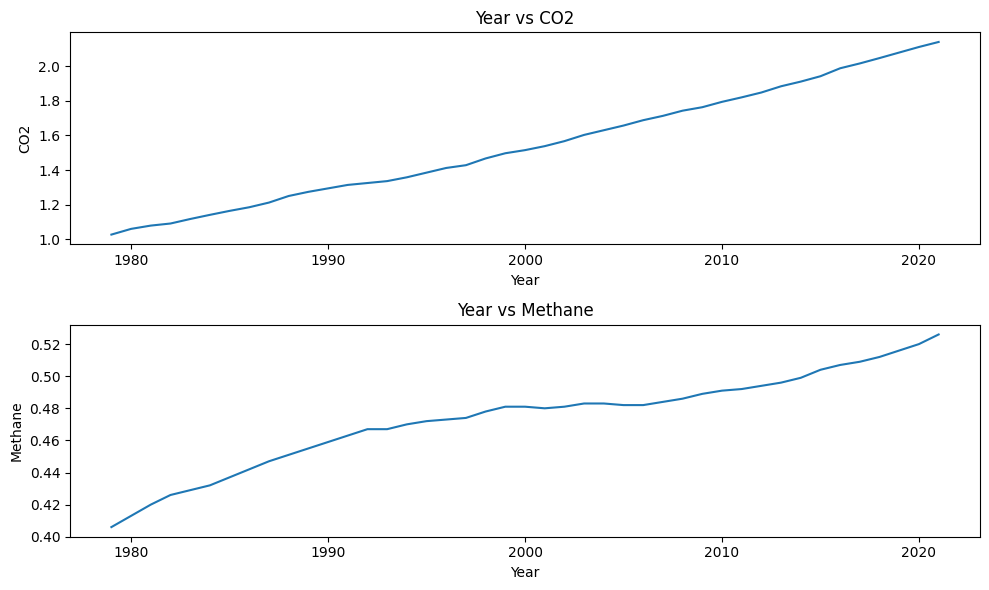

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Year vs. CO2
plt.subplot(2, 1, 1)
plt.plot(data['Year'], data['CO2'])
plt.title('Year vs CO2')
plt.xlabel('Year')
plt.ylabel('CO2')

# Year vs. Methane
plt.subplot(2, 1, 2)
plt.plot(data['Year'], data['Methane'])
plt.title('Year vs Methane')
plt.xlabel('Year')
plt.ylabel('Methane')

plt.tight_layout()
plt.show()


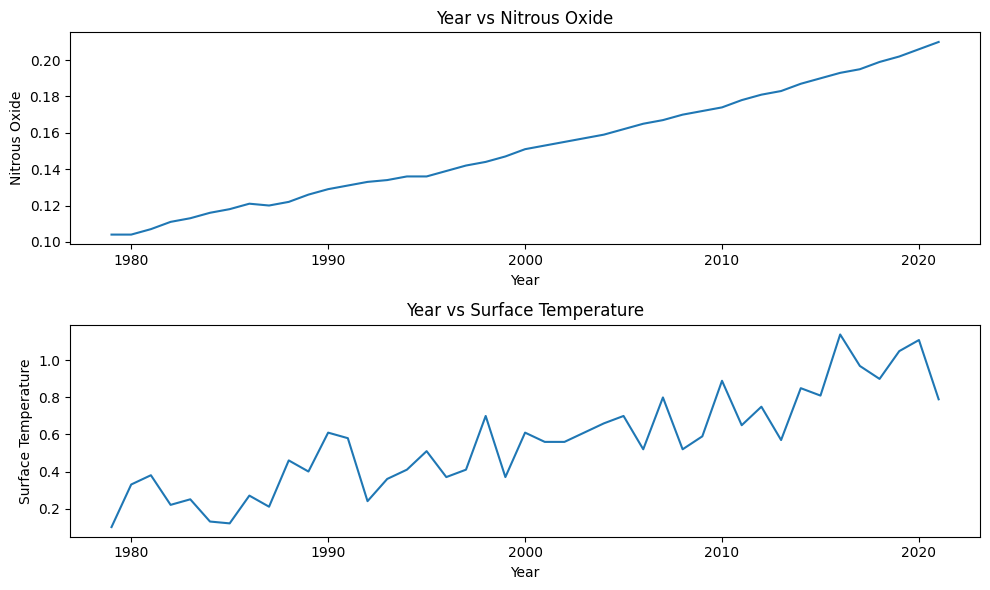

In [29]:
plt.figure(figsize=(10, 6))

# Year vs. Nitrous Oxide
plt.subplot(2, 1, 1)
plt.plot(data['Year'], data['Nitrous_Oxide'])
plt.title('Year vs Nitrous Oxide')
plt.xlabel('Year')
plt.ylabel('Nitrous Oxide')

# Year vs. Surface Temperature
plt.subplot(2, 1, 2)
plt.plot(data['Year'], data['Surface_Temperature'])
plt.title('Year vs Surface Temperature')
plt.xlabel('Year')
plt.ylabel('Surface Temperature')

plt.tight_layout()
plt.show()


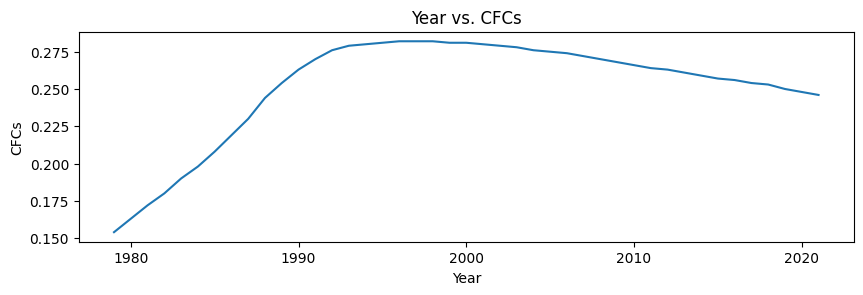

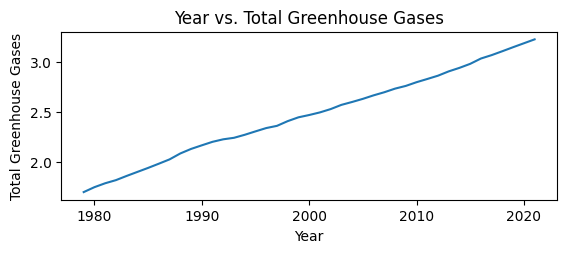

In [30]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(data['Year'], data['CFCs'])
plt.title('Year vs. CFCs')
plt.xlabel('Year')
plt.ylabel('CFCs')
plt.show()
plt.subplot(2, 1, 2)
plt.plot(data['Year'], data['Total_Greenhouse_Gases'])
plt.title('Year vs. Total Greenhouse Gases')
plt.xlabel('Year')
plt.ylabel('Total Greenhouse Gases')
plt.show()


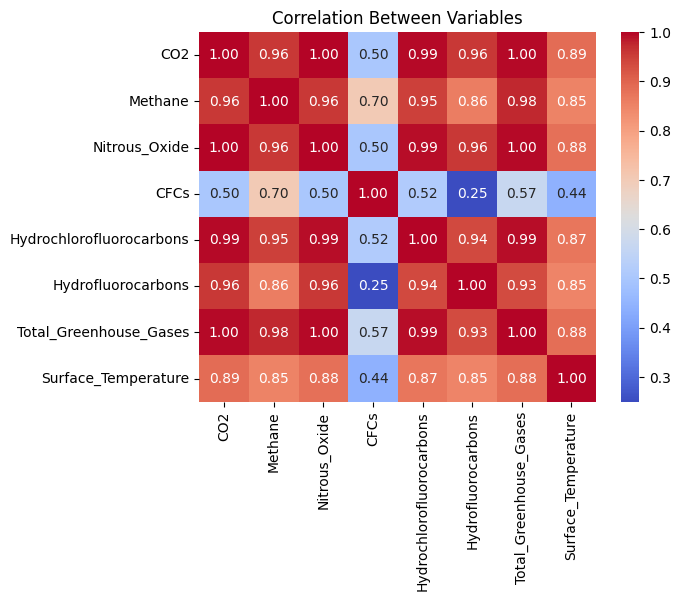

In [31]:
import seaborn as sns

# Select the variables for correlation analysis
correlation_variables = ['CO2', 'Methane', 'Nitrous_Oxide', 'CFCs', 'Hydrochlorofluorocarbons', 'Hydrofluorocarbons', 'Total_Greenhouse_Gases', 'Surface_Temperature']

# Compute the correlation matrix
correlation_matrix = data[correlation_variables].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Variables')
plt.show()


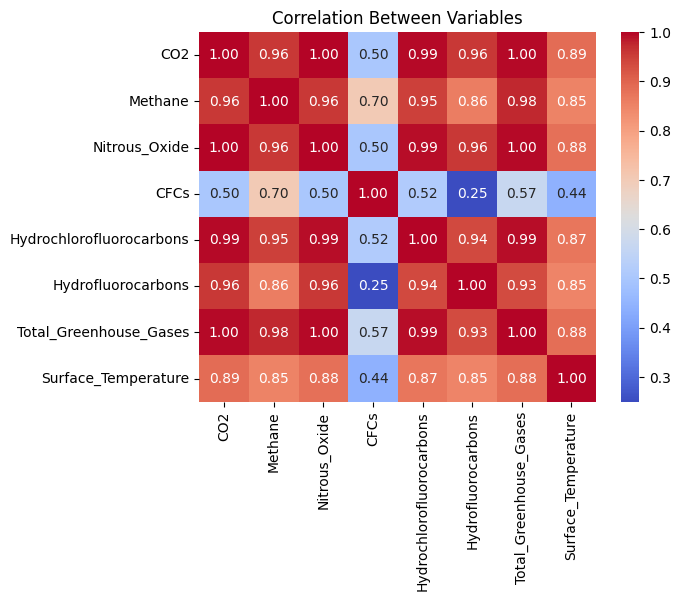

In [32]:
import seaborn as sns

# Select the variables for correlation analysis
correlation_variables = ['CO2', 'Methane', 'Nitrous_Oxide', 'CFCs', 'Hydrochlorofluorocarbons', 'Hydrofluorocarbons', 'Total_Greenhouse_Gases', 'Surface_Temperature']

# Compute the correlation matrix
correlation_matrix = data[correlation_variables].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Variables')
plt.show()


# data Modeling

## data setting for Models

In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanAbsoluteError

# Assuming you have your time series data stored in a pandas DataFrame named 'data' with columns: Year, CO2, Methane, Nitrous_Oxide, CFCs, ...

# Extract the variables for prediction
target_variables = ['CO2', 'Methane', 'Nitrous_Oxide', 'CFCs',
       'Hydrochlorofluorocarbons', 'Hydrofluorocarbons',
       'Total_Greenhouse_Gases', 'Total_Greenhouse_Gases_Scaled',
       '1990_Equals_1', 'Change', 'Surface_Temperature', 'CO2_Mean']

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[target_variables])

# Define the number of time steps (lags) to consider
time_steps = 1

# Prepare the training data
train_data = data_scaled[data['Year'] < 2012]
X_train = []
y_train = []
for i in range(time_steps, len(data_scaled)):
    X_train.append(data_scaled[i - time_steps:i])
    y_train.append(data_scaled[i])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Prepare the test data
test_data = data_scaled[data['Year'] >= 2012]
X_test = []
y_test = []
for i in range(0, len(test_data)):
    val=i+len(train_data)
    X_test.append(data_scaled[val - time_steps:val])
    y_test.append(test_data[i])

X_test = np.array(X_test)
y_test = np.array(y_test)


In [34]:
y_test.shape,y_train.shape

((10, 12), (42, 12))

### LSTM Model

In [35]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(target_variables), activation='linear'))  # Adjust the output dimension based on the number of target variables

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[MeanAbsoluteError()])

# Train the model
history=model.fit(X_train, y_train, epochs=500, batch_size=16)


Epoch 1/500
3/3 [==============================] - 3s 11ms/step - loss: 0.3179 - mean_absolute_error: 0.4871
Epoch 2/500
3/3 [==============================] - 0s 7ms/step - loss: 0.2973 - mean_absolute_error: 0.4655
Epoch 3/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2749 - mean_absolute_error: 0.4402
Epoch 4/500
3/3 [==============================] - 0s 11ms/step - loss: 0.2541 - mean_absolute_error: 0.4131
Epoch 5/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2328 - mean_absolute_error: 0.3838
Epoch 6/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2164 - mean_absolute_error: 0.3570
Epoch 7/500
3/3 [==============================] - 0s 7ms/step - loss: 0.2033 - mean_absolute_error: 0.3367
Epoch 8/500
3/3 [==============================] - 0s 8ms/step - loss: 0.1910 - mean_absolute_error: 0.3232
Epoch 9/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1784 - mean_absolute_error: 0.3094
Epoch 10/500
3/3 [========

In [36]:
model.save('/content/drive/MyDrive/ClumateChangeData/Lstm.h5')

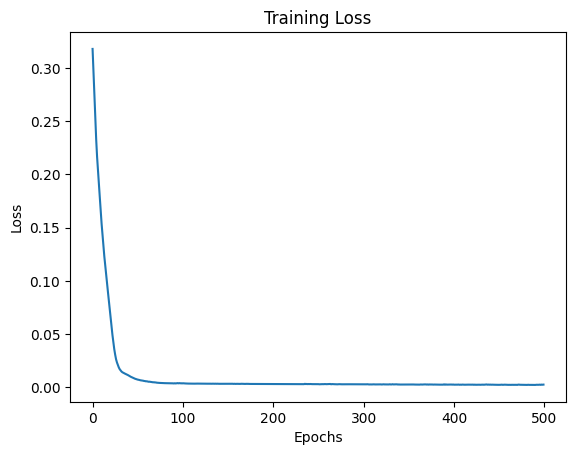

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### LSTM Predictions

In [38]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Inverse scale the predictions
y_pred = scaler.inverse_transform(y_pred)



1/1 [==============================] - 0s 478ms/step


In [39]:
print(y_pred)

[[1.8596804e+00 4.9516976e-01 1.8304424e-01 2.6000109e-01 5.0773751e-02
  2.4585906e-02 2.8688438e+00 4.7459573e+02 1.3326311e+00 1.6888655e+00
  7.6850230e-01 3.9589783e+02]
 [1.8927063e+00 4.9737561e-01 1.8557440e-01 2.5795472e-01 5.2376401e-02
  2.6322525e-02 2.9164963e+00 4.7792603e+02 1.3527235e+00 1.8086605e+00
  7.9358214e-01 3.9816641e+02]
 [1.9205781e+00 4.9726197e-01 1.8704225e-01 2.5870594e-01 5.3085260e-02
  2.7983600e-02 2.9273400e+00 4.8221875e+02 1.3514436e+00 1.5917355e+00
  8.5314447e-01 4.0022421e+02]
 [1.9632354e+00 5.0010800e-01 1.9025977e-01 2.5462291e-01 5.5012625e-02
  3.0126363e-02 2.9954839e+00 4.8573465e+02 1.3830442e+00 1.9316664e+00
  8.7190747e-01 4.0186490e+02]
 [2.0048487e+00 5.0121081e-01 1.9327642e-01 2.5423920e-01 5.6272257e-02
  3.2495655e-02 3.0335774e+00 4.9048236e+02 1.3955380e+00 1.8914292e+00
  9.3006974e-01 4.0393536e+02]
 [2.0580938e+00 5.0659102e-01 1.9913892e-01 2.4810174e-01 5.4213535e-02
  3.5454586e-02 3.0558417e+00 4.9270352e+02 1.4219729

In [40]:
# Convert the values to a more readable format
formatted_values = [f'{value:.2f}' for value in y_pred[3]]

# Print the formatted values
print(formatted_values)

['1.96', '0.50', '0.19', '0.25', '0.06', '0.03', '3.00', '485.73', '1.38', '1.93', '0.87', '401.86']


In [41]:
# Inverse scale the predictions
yy = scaler.inverse_transform(y_test)
yy = [f'{value:.2f}' for value in yy[3]]
# Print the formatted values
print(yy)

['1.94', '0.50', '0.19', '0.26', '0.05', '0.03', '2.98', '485.00', '1.38', '1.80', '0.81', '401.01']


### Predict any Year Value

In [42]:
# Preprocess the input for prediction
input_year = int(input("Please enter a year: "))

prediction_val = []
if input_year>2021:
  # Prepare the input data
  input_data = data[data['Year'] <= 2021]
  input_data_scaled = scaler.transform(input_data[target_variables])
  # Prepare the input sequence
  input_sequences = []
  for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
      input_sequences.append(input_data_scaled[i - time_steps:i])

  for year in range(2022, input_year + 1):
      input_sequences_array = np.array([sequence for sequence in input_sequences if len(sequence) == time_steps])
      input_sequence_reshaped = np.reshape(input_sequences_array, (input_sequences_array.shape[0], input_sequences_array.shape[1], len(target_variables)))

      # Make predictions for the input sequence
      predictions = model.predict(input_sequence_reshaped[-1].reshape(1, time_steps, len(target_variables)))

      # Inverse transform the predicted values
      prediction = scaler.inverse_transform(predictions)

      # Get the predicted values for the current year
      predicted_values = prediction[0]
      
      # Append the predicted values to the results
      prediction_val.append(predicted_values)
      # for variable, value in zip(target_variables, prediction_val[-1]):
      #   print(f"{variable}: {value}")
      # Update the input sequence for the next iteration
      input_sequences[0][:-1] = input_sequences[0][1:]  # Remove the first value
      input_sequences[0][-1] = np.array(predictions)  # Add predictions at the last index

else:
      input_data = data[data['Year'] < input_year]
      input_data_scaled = scaler.transform(input_data[target_variables])
      print("h1")
      # Prepare the input sequence
      input_sequence = []
      for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
          input_sequence.append(input_data_scaled[i - time_steps:i])

      input_sequence = np.array(input_sequence)

      # Reshape the input sequence for LSTM (input_shape: [samples, time_steps, features])
      input_sequence = np.reshape(input_sequence, (input_sequence.shape[0], input_sequence.shape[1], len(target_variables)))

      # Make predictions for the input sequence
      predictions = model.predict(input_sequence)

      # Inverse transform the predicted values
      prediction_val = scaler.inverse_transform(predictions)

      # Get the predicted values for the year 2022
      predicted_values = prediction_val[-1]
print("Predictions for year: ",input_year)
for variable, value in zip(target_variables, prediction_val[-1]):
    print(f"{variable}: {value}")


Please enter a year: 2023
1/1 [==============================] - 0s 25ms/step
Predictions for year:  2023
CO2: 2.176135301589966
Methane: 0.5327298641204834
Nitrous_Oxide: 0.21505144238471985
CFCs: 0.2451097071170807
Hydrochlorofluorocarbons: 0.0583132803440094
Hydrofluorocarbons: 0.04642724245786667
Total_Greenhouse_Gases: 3.243694543838501
Total_Greenhouse_Gases_Scaled: 511.7192077636719
1990_Equals_1: 1.4977898597717285
Change: 1.7490246295928955
Surface_Temperature: 0.9855714440345764
CO2_Mean: 421.6216735839844


In [43]:
# Preprocess the input for prediction
input_year = int(input("Please enter a year: "))

prediction_val = []
if input_year>2021:
  # Prepare the input data
  input_data = data[data['Year'] <= 2021]
  input_data_scaled = scaler.transform(input_data[target_variables])
  # Prepare the input sequence
  input_sequences = []
  for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
      input_sequences.append(input_data_scaled[i - time_steps:i])

  for year in range(2022, input_year + 1):
      input_sequences_array = np.array([sequence for sequence in input_sequences if len(sequence) == time_steps])
      input_sequence_reshaped = np.reshape(input_sequences_array, (input_sequences_array.shape[0], input_sequences_array.shape[1], len(target_variables)))

      # Make predictions for the input sequence
      predictions = model.predict(input_sequence_reshaped[-1].reshape(1, time_steps, len(target_variables)))

      # Inverse transform the predicted values
      prediction = scaler.inverse_transform(predictions)

      # Get the predicted values for the current year
      predicted_values = prediction[0]
      
      # Append the predicted values to the results
      prediction_val.append(predicted_values)
      # for variable, value in zip(target_variables, prediction_val[-1]):
      #   print(f"{variable}: {value}")
      # Update the input sequence for the next iteration
      input_sequences[0][:-1] = input_sequences[0][1:]  # Remove the first value
      input_sequences[0][-1] = np.array(predictions)  # Add predictions at the last index

else:
      input_data = data[data['Year'] < input_year]
      input_data_scaled = scaler.transform(input_data[target_variables])
      print("h1")
      # Prepare the input sequence
      input_sequence = []
      for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
          input_sequence.append(input_data_scaled[i - time_steps:i])

      input_sequence = np.array(input_sequence)

      # Reshape the input sequence for LSTM (input_shape: [samples, time_steps, features])
      input_sequence = np.reshape(input_sequence, (input_sequence.shape[0], input_sequence.shape[1], len(target_variables)))

      # Make predictions for the input sequence
      predictions = model.predict(input_sequence)

      # Inverse transform the predicted values
      prediction_val = scaler.inverse_transform(predictions)

      # Get the predicted values for the year 2022
      predicted_values = prediction_val[-1]
print("Predictions for year: ",input_year)
for variable, value in zip(target_variables, prediction_val[-1]):
    print(f"{variable}: {value}")


Please enter a year: 2050
1/1 [==============================] - 0s 23ms/step
Predictions for year:  2050
CO2: 2.805161476135254
Methane: 0.6179883480072021
Nitrous_Oxide: 0.27682462334632874
CFCs: 0.2711697518825531
Hydrochlorofluorocarbons: 0.07273931801319122
Hydrofluorocarbons: 0.0791701003909111
Total_Greenhouse_Gases: 4.03023624420166
Total_Greenhouse_Gases_Scaled: 588.7102661132812
1990_Equals_1: 1.8023794889450073
Change: 1.8588764667510986
Surface_Temperature: 1.367506980895996
CO2_Mean: 473.2847595214844


In [44]:
prediction_val

[array([2.1416802e+00, 5.2806628e-01, 2.1181972e-01, 2.4438472e-01,
        5.6646377e-02, 4.3810870e-02, 3.1968219e+00, 5.0567346e+02,
        1.4847665e+00, 1.7288756e+00, 9.3869787e-01, 4.1802069e+02],
       dtype=float32),
 array([2.1761353e+00, 5.3272986e-01, 2.1505144e-01, 2.4510971e-01,
        5.8313280e-02, 4.6427242e-02, 3.2436945e+00, 5.1171921e+02,
        1.4977899e+00, 1.7490246e+00, 9.8557144e-01, 4.2162167e+02],
       dtype=float32),
 array([2.2134085e+00, 5.3902590e-01, 2.1957254e-01, 2.4483989e-01,
        5.9242230e-02, 4.8905224e-02, 3.2881432e+00, 5.1585535e+02,
        1.5199674e+00, 1.7540066e+00, 9.9928588e-01, 4.2534189e+02],
       dtype=float32),
 array([2.2489853e+00, 5.4491317e-01, 2.2372147e-01, 2.4524294e-01,
        6.0331546e-02, 5.1441833e-02, 3.3381109e+00, 5.2065375e+02,
        1.5406981e+00, 1.7666229e+00, 1.0213462e+00, 4.2907248e+02],
       dtype=float32),
 array([2.2875245e+00, 5.5060804e-01, 2.2765304e-01, 2.4650654e-01,
        6.1230041e-0

### Actual and predicted values Graph

In [45]:
# Prepare the data for prediction
X_all = []
y_all=[]
for i in range(time_steps, len(data_scaled)):
    X_all.append(data_scaled[i - time_steps:i])
    y_all.append(data_scaled[i])

X_all = np.array(X_all)
y_all = np.array(y_all)
# Make predictions on all data
y_pred_all = model.predict(X_all)

# Denormalize the predicted values
y_pred_all_denormalized = scaler.inverse_transform(y_pred_all)
y_all_denormalized = scaler.inverse_transform(y_all)



2/2 [==============================] - 0s 7ms/step


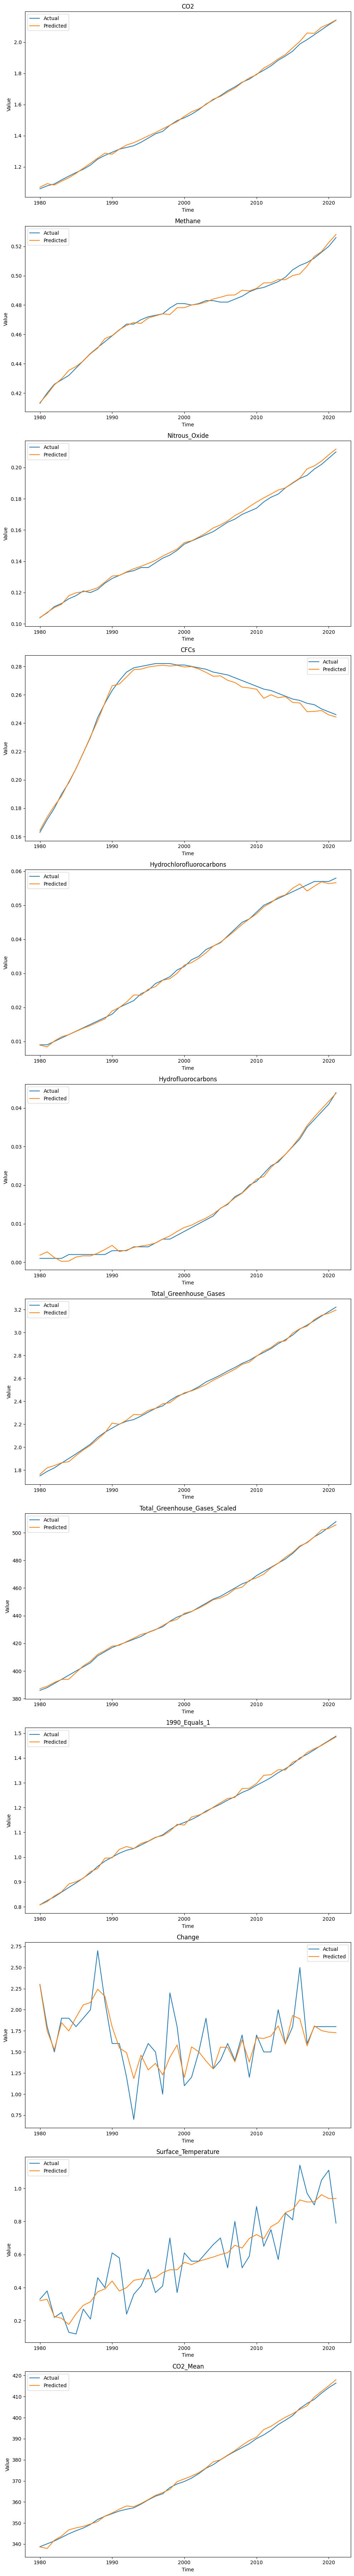

In [46]:
# Plot actual vs predicted for each target variable
fig, axes = plt.subplots(len(target_variables), 1, figsize=(10, 6 * len(target_variables)))

for i, target_variable in enumerate(target_variables):
    axes[i].plot(data['Year'][time_steps:], data[target_variable][time_steps:], label='Actual')
    axes[i].plot(data['Year'][time_steps:], y_pred_all_denormalized[:, i], label='Predicted')
    axes[i].set_title(target_variable)
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Value')
    axes[i].legend()

plt.tight_layout()
plt.show()


In [47]:
X_train.shape

(42, 1, 12)

## ANN Model

In [48]:
from tensorflow.keras.layers import Flatten

# Build the ANN model
ANN_Model = Sequential()
ANN_Model.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
ANN_Model.add(Dense(256, activation='relu'))
ANN_Model.add(Dense(128, activation='relu'))
ANN_Model.add(Dense(64, activation='relu'))
ANN_Model.add(Dense(32, activation='relu'))
ANN_Model.add(Dense(16, activation='relu'))
ANN_Model.add(Dense(X_train.shape[2], activation='linear'))  # Adjust the output dimension based on the number of features

# Compile the model
ANN_Model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[MeanAbsoluteError()])

# Train the model
history = ANN_Model.fit(X_train, y_train, epochs=300, batch_size=16)


Epoch 1/300
3/3 [==============================] - 1s 7ms/step - loss: 0.3322 - mean_absolute_error: 0.5024
Epoch 2/300
3/3 [==============================] - 0s 6ms/step - loss: 0.3020 - mean_absolute_error: 0.4773
Epoch 3/300
3/3 [==============================] - 0s 6ms/step - loss: 0.2786 - mean_absolute_error: 0.4549
Epoch 4/300
3/3 [==============================] - 0s 7ms/step - loss: 0.2565 - mean_absolute_error: 0.4283
Epoch 5/300
3/3 [==============================] - 0s 6ms/step - loss: 0.2349 - mean_absolute_error: 0.3961
Epoch 6/300
3/3 [==============================] - 0s 5ms/step - loss: 0.2186 - mean_absolute_error: 0.3633
Epoch 7/300
3/3 [==============================] - 0s 7ms/step - loss: 0.2038 - mean_absolute_error: 0.3345
Epoch 8/300
3/3 [==============================] - 0s 6ms/step - loss: 0.1899 - mean_absolute_error: 0.3155
Epoch 9/300
3/3 [==============================] - 0s 7ms/step - loss: 0.1755 - mean_absolute_error: 0.3012
Epoch 10/300
3/3 [==========

### ANN Predictions

In [49]:
# Make predictions on the test data
y_pred = ANN_Model.predict(X_test)

# Denormalize the predicted and actual values
y_pred = scaler.inverse_transform(y_pred)


1/1 [==============================] - 0s 83ms/step


In [50]:
# Convert the values to a more readable format
formatted_values = [f'{value:.2f}' for value in y_pred[1]]

# Print the formatted values
print(formatted_values)

['1.86', '0.50', '0.18', '0.26', '0.05', '0.03', '2.97', '480.63', '1.35', '1.71', '0.81', '399.20']


In [51]:
# # Inverse scale the predictions
yy = scaler.inverse_transform(y_test)
yy = [f'{value:.2f}' for value in yy[1]]
# Print the formatted values
print(yy)

['1.88', '0.50', '0.18', '0.26', '0.05', '0.03', '2.90', '478.00', '1.34', '2.00', '0.57', '396.74']


In [52]:
# Preprocess the input for prediction
input_year = int(input("Please enter a year: "))

prediction_val = []
if input_year>2021:
  # Prepare the input data
  input_data = data[data['Year'] <= 2021]
  input_data_scaled = scaler.transform(input_data[target_variables])
  # Prepare the input sequence
  input_sequences = []
  for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
      input_sequences.append(input_data_scaled[i - time_steps:i])

  for year in range(2022, input_year + 1):
      input_sequences_array = np.array([sequence for sequence in input_sequences if len(sequence) == time_steps])
      input_sequence_reshaped = np.reshape(input_sequences_array, (input_sequences_array.shape[0], input_sequences_array.shape[1], len(target_variables)))

      # Make predictions for the input sequence
      predictions = ANN_Model.predict(input_sequence_reshaped[-1].reshape(1, time_steps, len(target_variables)))

      # Inverse transform the predicted values
      prediction = scaler.inverse_transform(predictions)

      # Get the predicted values for the current year
      predicted_values = prediction[0]
      
      # Append the predicted values to the results
      prediction_val.append(predicted_values)
      # for variable, value in zip(target_variables, prediction_val[-1]):
      #   print(f"{variable}: {value}")
      # Update the input sequence for the next iteration
      input_sequences[0][:-1] = input_sequences[0][1:]  # Remove the first value
      input_sequences[0][-1] = np.array(predictions)  # Add predictions at the last index

else:
      input_data = data[data['Year'] < input_year]
      input_data_scaled = scaler.transform(input_data[target_variables])
      print("h1")
      # Prepare the input sequence
      input_sequence = []
      for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
          input_sequence.append(input_data_scaled[i - time_steps:i])

      input_sequence = np.array(input_sequence)

      # Reshape the input sequence for LSTM (input_shape: [samples, time_steps, features])
      input_sequence = np.reshape(input_sequence, (input_sequence.shape[0], input_sequence.shape[1], len(target_variables)))

      # Make predictions for the input sequence
      predictions = model.predict(input_sequence)

      # Inverse transform the predicted values
      prediction_val = scaler.inverse_transform(predictions)

      # Get the predicted values for the year 2022
      predicted_values = prediction_val[-1]
print("Predictions for year: ",input_year)
for variable, value in zip(target_variables, prediction_val[-1]):
    print(f"{variable}: {value}")


Please enter a year: 2022
1/1 [==============================] - 0s 23ms/step
Predictions for year:  2022
CO2: 2.0974204540252686
Methane: 0.5228990316390991
Nitrous_Oxide: 0.20951713621616364
CFCs: 0.24525763094425201
Hydrochlorofluorocarbons: 0.06345458328723907
Hydrofluorocarbons: 0.04381246119737625
Total_Greenhouse_Gases: 3.256453037261963
Total_Greenhouse_Gases_Scaled: 508.66119384765625
1990_Equals_1: 1.4674886465072632
Change: 1.9037431478500366
Surface_Temperature: 0.9973613619804382
CO2_Mean: 416.48419189453125


In [53]:
# Preprocess the input for prediction
input_year = int(input("Please enter a year: "))

prediction_val = []
if input_year>2021:
  # Prepare the input data
  input_data = data[data['Year'] <= 2021]
  input_data_scaled = scaler.transform(input_data[target_variables])
  # Prepare the input sequence
  input_sequences = []
  for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
      input_sequences.append(input_data_scaled[i - time_steps:i])

  for year in range(2022, input_year + 1):
      input_sequences_array = np.array([sequence for sequence in input_sequences if len(sequence) == time_steps])
      input_sequence_reshaped = np.reshape(input_sequences_array, (input_sequences_array.shape[0], input_sequences_array.shape[1], len(target_variables)))

      # Make predictions for the input sequence
      predictions = ANN_Model.predict(input_sequence_reshaped[-1].reshape(1, time_steps, len(target_variables)))

      # Inverse transform the predicted values
      prediction = scaler.inverse_transform(predictions)

      # Get the predicted values for the current year
      predicted_values = prediction[0]
      
      # Append the predicted values to the results
      prediction_val.append(predicted_values)
      # for variable, value in zip(target_variables, prediction_val[-1]):
      #   print(f"{variable}: {value}")
      # Update the input sequence for the next iteration
      input_sequences[0][:-1] = input_sequences[0][1:]  # Remove the first value
      input_sequences[0][-1] = np.array(predictions)  # Add predictions at the last index

else:
      input_data = data[data['Year'] < input_year]
      input_data_scaled = scaler.transform(input_data[target_variables])
      print("h1")
      # Prepare the input sequence
      input_sequence = []
      for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
          input_sequence.append(input_data_scaled[i - time_steps:i])

      input_sequence = np.array(input_sequence)

      # Reshape the input sequence for LSTM (input_shape: [samples, time_steps, features])
      input_sequence = np.reshape(input_sequence, (input_sequence.shape[0], input_sequence.shape[1], len(target_variables)))

      # Make predictions for the input sequence
      predictions = model.predict(input_sequence)

      # Inverse transform the predicted values
      prediction_val = scaler.inverse_transform(predictions)

      # Get the predicted values for the year 2022
      predicted_values = prediction_val[-1]
print("Predictions for year: ",input_year)
for variable, value in zip(target_variables, prediction_val[-1]):
    print(f"{variable}: {value}")


Please enter a year: 2050
1/1 [==============================] - 0s 36ms/step
Predictions for year:  2050
CO2: 2.607273817062378
Methane: 0.5807796716690063
Nitrous_Oxide: 0.2595285475254059
CFCs: 0.29159092903137207
Hydrochlorofluorocarbons: 0.09117135405540466
Hydrofluorocarbons: 0.06382530927658081
Total_Greenhouse_Gases: 4.07798433303833
Total_Greenhouse_Gases_Scaled: 569.967529296875
1990_Equals_1: 1.8113346099853516
Change: 2.402684450149536
Surface_Temperature: 1.4421086311340332
CO2_Mean: 458.5355224609375


In [54]:
ANN_Model.save('/content/drive/MyDrive/ClumateChangeData/ann_model.h5')